# Домашняя работа 4. Cравнение центров распределений.

Вариант 2.

Лазарев Эдуард Артемович
N33471

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]

In [2]:
from io import StringIO
from scipy import stats

In [3]:
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

## Задача 1.

## Nursing Home Data. Расходы больницы за год.

In [4]:
# Загружаем данные
with open("Nursing Home Data/Nursing Home Data_data") as file:
    rav_data = file.readlines()

rav_data = list(map(lambda s: ",".join(s.split()), rav_data))

data = pd.read_csv(StringIO("\n".join(rav_data)), delimiter=",")
len(data)

52

Проверяем правильность данных

In [5]:
data

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0
5,65,180,234,10531,3622,449,1
6,120,306,372,22147,4406,4998,1
7,90,214,305,14025,4173,966,1
8,96,155,169,8812,1955,1260,0
9,120,133,188,11729,3224,6442,1


In [6]:
data.dtypes

BED       int64
MCDAYS    int64
TDAYS     int64
PCREV     int64
NSAL      int64
FEXP      int64
RURAL     int64
dtype: object

Видим что данные считались верно и выбросов нету.

Хотим проверить, что расходы за год в городской больнице (```RURAL = 0```) отличается от расходов за год в загородной (```RURAL = 1```). Попробуем применить критерий Стьюдента, но предварительно нужно:

1. Проверить нормальность данных,
2. Проверить равенство дисперсий.

In [7]:
x = data[data['RURAL'] == 0]['FEXP']
y = data[data['RURAL'] == 1]['FEXP']
x.name, y.name = 'town', 'rural'

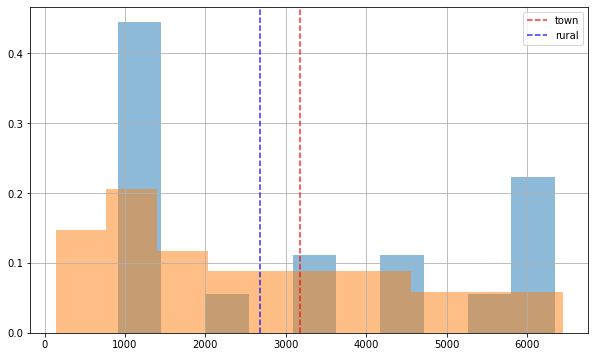

In [8]:
two_histograms(x, y)

Очевидно что оба распределения отличаются от нормальных, поэтому мы не можем применить критерий Стюдента.

Будем применять непараметрический критерий Манна-Уитни для проверки гипотезы о равенстве медиан, потому что у нас в разных выборках находятся разные объекты (больницы).

In [9]:
res = stats.mannwhitneyu(x, y)
print('Mann-Whitney p-value:', res[1])

Mann-Whitney p-value: 0.26594759448891914


*p-value* получилось достаточно большим (больше $\alpha = 0.05$), поэтому у нас нет оснований отвергнуть гипотезу. 

### Вывод: 

Расходы за год в городской большнице не сильно отличаются от расходов в загородной. 

Приведем ящиковую диаграмму, построенную по сравниваемым выборкам:

<AxesSubplot:title={'center':'FEXP'}, xlabel='RURAL'>

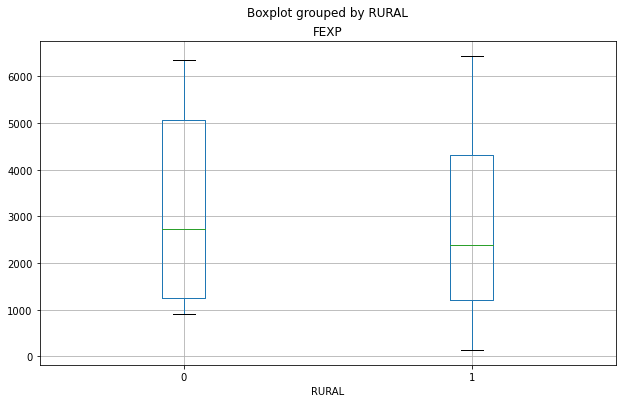

In [10]:
data.boxplot(by='RURAL', column='FEXP')

## Задача 2.

## Unions and State Labor Law. State right-to-work law.

In [11]:
# Загружаем данные
data = pd.read_csv("Unions and State Labor Law/Unions and State Labor Law_data", delimiter="\t")
len(data)

50

Проверяем правильность данных

In [12]:
data

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1
5,WV,30.2,0,0,28.5
6,IL,30.6,0,0,26.9
7,OR,35.1,1,0,25.5
8,OH,38.4,1,0,25.3
9,PA,46.2,1,0,23.6


In [13]:
data.dtypes

  STATE     object
DENS       float64
COMP         int64
RTW          int64
PVT        float64
dtype: object

Видим что данные считались верно и выбросов нету.

Хотим проверить, что процент муниципальных служащих, состоящих в профсоюзе, в штатах, где State right-to-work law принят (`RTW = 1`) отличается от процента в штатах, где этот закон не принят (`RTW = 0`). Попробуем применить критерий Стьюдента, но предварительно нужно:

1. Проверить нормальность данных,
2. Проверить равенство дисперсий.

In [14]:
x = data[data['RTW'] == 0]['DENS']
y = data[data['RTW'] == 1]['DENS']
x.name, y.name = 'not cover', 'cover'

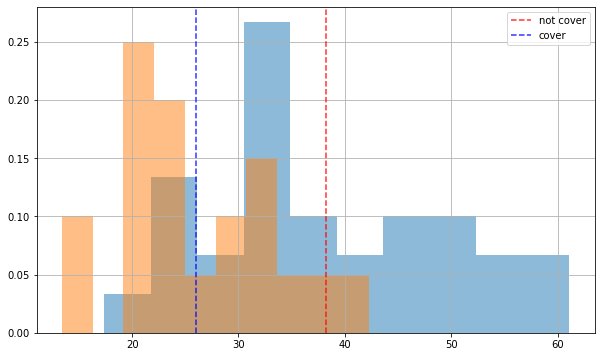

In [15]:
two_histograms(x, y)

Очевидно что оба распределения отличаются от нормальных, поэтому мы не можем применить критерий Стюдента.

Будем применять непараметрический критерий Манна-Уитни для проверки гипотезы о равенстве медиан, потому что у нас в разных выборках находятся разные объекты (штаты).

In [16]:
res = stats.mannwhitneyu(x, y)
print('Mann-Whitney p-value:', res[1])

Mann-Whitney p-value: 0.00010624487970362637


*p-value* получилось очень малельким (меньше $\alpha = 0.05, 0.01$), поэтому гипотезу мы отвергаем. 

### Вывод: 

Процент муниципальных служащих в штатах в которых принят State right-to-work law отличается (меньше) от процента в штатах, где этот закон не принят.

Приведем ящиковую диаграмму, построенную по сравниваемым выборкам:

<AxesSubplot:title={'center':'DENS'}, xlabel='RTW'>

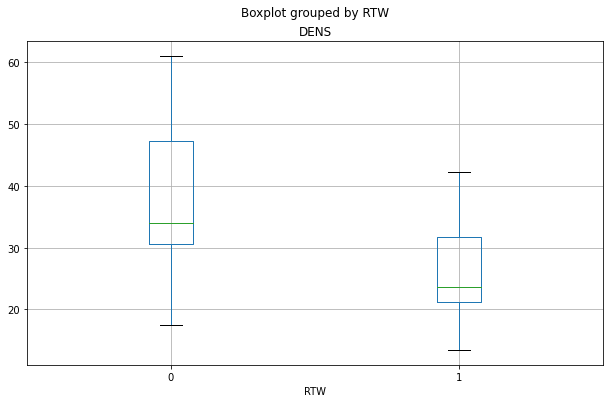

In [17]:
data.boxplot(by='RTW', column='DENS')